<a href="https://colab.research.google.com/github/Mohamed-Maher5/Unsupervised-Machine-Learning/blob/main/Kmeans_DBSCAN_GMM/Clustering_using_Kmeans_DBSCAN_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## sklearn -- Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

## sklearn -- metrics
from sklearn.metrics import accuracy_score

## sklearn -- Decomposition
from sklearn.decomposition import PCA

## sklearn -- Models
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture

**Study the dataset**

In [ ]:
file_path = '/content/creditcard.csv'
creditcard_dataset = pd.read_csv(file_path)

In [ ]:
creditcard_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
## check the info (nulls and datatypes)
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
## some statistics of the dataset
creditcard_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
## check the nulls
creditcard_dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

WE CAN SEE THERE IS NO NULL VALUES

**Exploratory Data Analysis (EDA)**

In [ ]:
Class_values = creditcard_dataset['Class'].value_counts()
Class_values

0    284315
1       492
Name: Class, dtype: int64

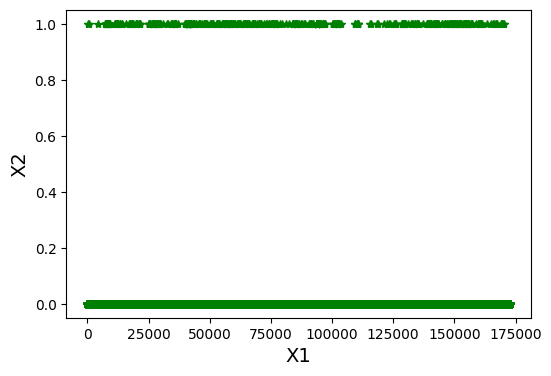

In [ ]:
### Plotting
plt.figure(figsize=(6, 4))
plt.plot(creditcard_dataset['Time'], creditcard_dataset['Class'], 'g*')
plt.xlabel('X1', fontsize=14)
plt.ylabel('X2', fontsize=14)
plt.show()


**Check the Correlation between the Features and the Target**

In [ ]:
## Correlations
creditcard_dataset.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

**Split the Dataset**

In [ ]:
## Split the Data to Features and Target
X = creditcard_dataset.drop(columns=['Class'], axis=1)
y = creditcard_dataset['Class']

## Split the Dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2018, stratify=creditcard_dataset['Class'])

## Data shapes
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (190820, 30)
y_train shape --  (190820,)
X_test shape --  (93987, 30)
y_test shape --  (93987,)


**PreProcessing Data**

In [ ]:
## Pipeline
num_pipeline = Pipeline(steps=[
                              ('scaler', StandardScaler())
                              ]
                        )
## fit and transform
X_train_final = num_pipeline.fit_transform(X_train)
X_test_final = num_pipeline.transform(X_test)

**Dimentionality Reduction Using PAC**

In [ ]:
## Keeping 0.95 varaince
pca_95 = PCA(n_components=0.95)

## fit and Transform
X_train_95 = pca_95.fit_transform(X_train_final)
X_test_95 = pca_95.transform(X_test_final)

num_pc = len(pca_95.explained_variance_ratio_)
var_ratio = sum(pca_95.explained_variance_ratio_)
## Check the variance ratio
print('Number of Components is --- ', num_pc)
print('Variance Ratio when n_components=0.95 ---> ', var_ratio)

Number of Components is ---  27
Variance Ratio when n_components=0.95 --->  0.9569707179433096


**Model Selection**

Kmeans Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


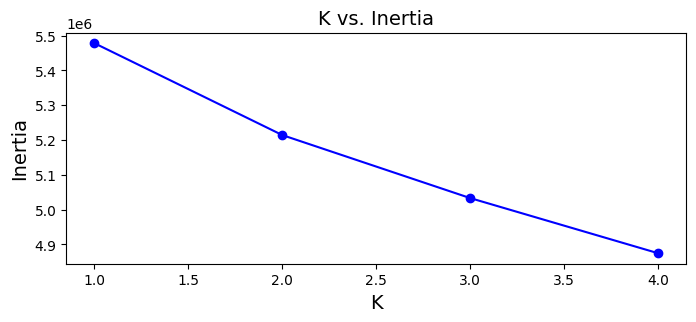

In [ ]:
## Try different K and choose according to Elbow Method
k_choose = np.arange(1, 5, 1)  ## space we search in

k_with_inertia = {}

for val in k_choose:  ## loop over the space of K
    ## define the algorithm
    kmeans_each = KMeans(n_clusters=val, n_init=10, algorithm='auto', init='k-means++', random_state=42)
    kmeans_each.fit(X_train_95)
    each_inertia = kmeans_each.inertia_   ## get the best inertia for each K
    k_with_inertia[val] = each_inertia    ## to the dictionary


## Plotting each K with the opposite Inertia
plt.figure(figsize=(8, 3))
plt.plot(k_with_inertia.keys(), k_with_inertia.values(), 'bo-')
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()  ### using elbow method , here k=4 is the best , but let's use other metrics to see

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=20, algorithm='auto', init='k-means++', random_state=123)
y_pred_Kmeans = kmeans.fit_predict(X_train_95)

cenroids = kmeans.cluster_centers_
print('centroids => \n', cenroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


centroids => 
 [[-6.59701559e-02  1.25319907e+00 -1.99593210e-02  5.68770823e-03
   4.89999054e-04  1.44597931e-01 -4.29908734e-02  1.68440175e-01
  -1.29798249e-02  8.86306755e-03  5.97799943e-02 -5.43631642e-02
  -1.48526745e-02  8.04708250e-03 -5.97953853e-04 -3.84337609e-02
  -9.14642451e-02  7.25776535e-02  3.52218303e-02  1.37208091e-02
   8.57540290e-02  1.94607653e-02  8.87790614e-03 -6.28759759e-02
   1.01041205e-03 -1.31540506e-02 -1.25056316e-02]
 [ 5.49189575e-02 -1.04326548e+00  1.66157725e-02 -4.73491387e-03
  -4.07915319e-04 -1.20375153e-01  3.57891218e-02 -1.40223388e-01
   1.08054686e-02 -7.37834287e-03 -4.97657603e-02  4.52563475e-02
   1.23645819e-02 -6.69905013e-03  4.97785730e-04  3.19954084e-02
   7.61423239e-02 -6.04195793e-02 -2.93215345e-02 -1.14223245e-02
  -7.13886727e-02 -1.62007339e-02 -7.39069573e-03  5.23431087e-02
  -8.41149693e-04  1.09505084e-02  1.04107113e-02]]


In [ ]:
## accuracy score
print('Accuracy Scores in training data -- ', accuracy_score(y_train, y_pred_Kmeans))

print('--'*30)

## If you want to use cross validation
scores_acc = cross_val_score(estimator=kmeans, X=X_train_95, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc.mean())

Accuracy Scores in training data --  0.4544439786185934
------------------------------------------------------------
Accuracy Scores using cross validation --  0.4899224399958076


**Evaluate the Model**

In [ ]:
y_test_pred = kmeans.predict(X_test_95)
print('Accuracy Score In Test Data --- ', accuracy_score(y_test, y_test_pred))

Accuracy Score In Test Data ---  0.4521901965165395


DBSCAN Algorithm

In [ ]:
DBScan = DBSCAN(eps=0.05, min_samples=40)
DBScan.fit(X_train_95)

DBSCAN(eps=0.05, min_samples=40)

In [ ]:
## Classes
np.unique(DBScan.labels_)

array([-1,  0,  1])

In [ ]:
## Core points are valid in
core_points = DBScan.components_
print('Core Points in this Dataset are --- \n', core_points)

print('**'*15)

## Indecies of core points
idx_cores = DBScan.core_sample_indices_
print('Number of core points in this Dataset ---', len(idx_cores))

Core Points in this Dataset are --- 
 [[-0.47852056 -0.1733817   0.2448955  ... -0.18902213 -0.76850254
  -0.58198737]
 [-0.47851487 -0.17356017  0.24489604 ... -0.18902141 -0.76850143
  -0.5819876 ]
 [-0.47851677 -0.17350068  0.24489586 ... -0.18902165 -0.7685018
  -0.58198752]
 ...
 [-0.47852908 -0.17311398  0.24489469 ... -0.18902322 -0.76850421
  -0.58198703]
 [-0.47854235 -0.17269754  0.24489343 ... -0.1890249  -0.76850681
  -0.58198651]
 [-0.4916781   1.13815101  0.13835521 ...  0.62847387 -1.36971083
  -0.33949514]]
******************************
Number of core points in this Dataset --- 102


**Predict Using KNN algorithm**

Because the DBSCAN algo cant predict a new data

In [ ]:
## Using KNN
knn_DBScan = KNeighborsClassifier(n_neighbors=5)

X_for_predict_KNN_DBScan = DBScan.components_
y_for_predict_KNN_DBScan = DBScan.labels_[DBScan.core_sample_indices_]

knn_DBScan.fit(X_for_predict_KNN_DBScan, y_for_predict_KNN_DBScan)

KNeighborsClassifier()

In [ ]:
## If you want to use cross validation
scores_acc_KNN = cross_val_score(estimator=knn_DBScan, X=X_train_95, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc_KNN.mean())

Accuracy Scores using cross validation --  0.9991824756314852


In [ ]:
y_test_pred_KNN = knn_DBScan.predict(X_test_95)
print('Accuracy Score In Test Data --- ', accuracy_score(y_test, y_test_pred_KNN))

Accuracy Score In Test Data ---  0.24775766861374446


In [ ]:
np.unique(y_test_pred_KNN)

array([0, 1])

**Gaussian Matrix Model Algorithm**

In [ ]:
GaussianMatrixModel = GaussianMixture(n_components=2, n_init=15, random_state=42)
GaussianMatrixModel.fit(X_train_95)

GaussianMixture(n_components=2, n_init=15, random_state=42)

In [ ]:
## If you want to use cross validation
scores_acc_Gaussian = cross_val_score(estimator=GaussianMatrixModel, X=X_train_95, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc_Gaussian.mean())

Accuracy Scores using cross validation --  0.46839953883240754


In [ ]:
y_test_pred_Gaussian = GaussianMatrixModel.predict(X_test_95)
print('Accuracy Score In Test Data --- ', accuracy_score(y_test, y_test_pred_Gaussian))

Accuracy Score In Test Data ---  0.4680647323566025
